<font color='orange'>**Please create your own copy before starting modification**</font>

Dependencies: Add Your dependencies here



In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
import string
from matplotlib import rcParams
rcParams['figure.figsize']= 6,6
from statistics import mean, stdev 
from scipy.stats import iqr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn import metrics


import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


import re
import nltk
import spacy

pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Load the data

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df= pd.read_csv('/content/drive/My Drive/train.csv')
print(df.dtypes)
df

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object


id keyword  ...                                               text target
0         1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1         4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2         5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3         6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4         7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1
...     ...     ...  ...                                                ...    ...
7608  10869     NaN  ...  Two giant cranes holding a bridge collapse int...      1
7609  10870     NaN  ...  @aria_ahrary @TheTawniest The out of control w...      1
7610  10871     NaN  ...  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...      1
7611  10872     NaN  ...  Police investigating after an e-bike collided ...      1
7612  10873     NaN  ...  The Latest: More Homes Razed by Northern Calif...      1

[7613 rows x 5 columns]

Plot the count for each target

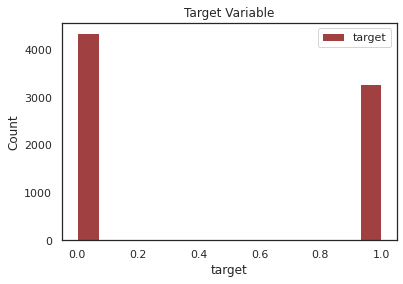

In [5]:
import seaborn as sns
sns.set(style='white', palette="deep", font_scale=1.0, rc={"figure.figsize": [6, 4]})
sns.histplot(data = df, x="target", color="maroon", label="target")
plt.title("Target Variable")
plt.legend() 
plt.show()

Print the unique keywords

In [6]:
unique_keywords = list(df['keyword'].unique())
print(unique_keywords)

[nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident', 'ambulance', 'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging', 'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse', 'buildings%20burning', 'buildings%20on%20fire', 'burned', 'burning', 'burning%20buildings', 'bush%20fires', 'casualties', 'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency', 'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided', 'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge', 'deluged', 'demolish', 'demolished', 'demolition', 'derail', 'derailed', 'derailment', 'desolate', 'desolation', 'destroy', 'destroyed', 'destruction', 'detonate', 'deto

Plot the count of each keyword

[61, 36, 35, 34, 35, 38, 34, 29, 32, 42, 34, 32, 34, 36, 35, 30, 26, 37, 30, 38, 34, 35, 33, 32, 37, 35, 35, 33, 33, 33, 41, 34, 38, 29, 35, 35, 33, 33, 34, 37, 25, 35, 34, 36, 30, 33, 36, 34, 35, 34, 40, 39, 33, 34, 37, 31, 37, 32, 41, 36, 30, 36, 38, 37, 42, 27, 34, 28, 35, 35, 38, 39, 29, 36, 37, 32, 34, 36, 32, 31, 36, 35, 36, 35, 32, 38, 34, 36, 39, 32, 34, 37, 35, 33, 36, 12, 40, 36, 36, 38, 33, 39, 32, 39, 38, 45, 37, 40, 38, 33, 29, 39, 34, 35, 38, 36, 19, 32, 35, 32, 41, 34, 35, 34, 39, 33, 35, 32, 31, 37, 38, 35, 33, 38, 35, 10, 33, 34, 33, 34, 33, 32, 36, 30, 33, 34, 37, 34, 34, 36, 31, 31, 29, 38, 40, 37, 37, 33, 37, 34, 37, 9, 34, 35, 36, 22, 35, 35, 34, 35, 28, 37, 37, 34, 36, 35, 29, 39, 41, 40, 29, 34, 29, 35, 33, 35, 35, 31, 33, 39, 32, 33, 30, 34, 31, 11, 38, 33, 35, 36, 32, 31, 35, 33, 34, 40, 38, 38, 33, 27, 24, 39, 39, 39, 31, 33, 40, 37, 33, 37, 39, 39]


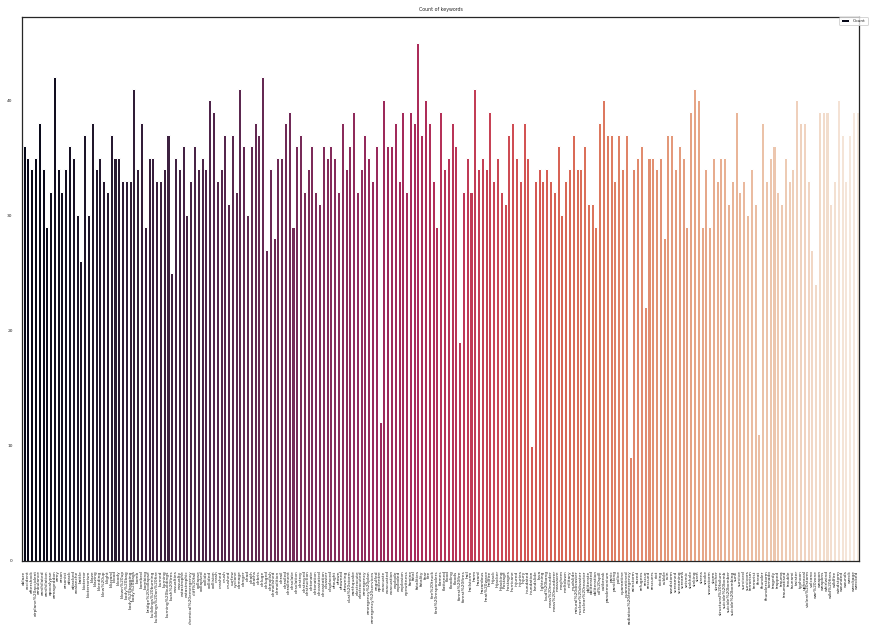

In [7]:
countList=[]
for i in unique_keywords:
  cnt=list(df['keyword']).count(i)
  countList.append(cnt)
print(countList)
sns.set(style='white', palette="deep", font_scale=0.4, rc={"figure.figsize": [15, 10]})
sns.barplot(x=unique_keywords,y=countList, palette="rocket", label="Count")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Count of keywords")
plt.xticks(rotation=90)
plt.show()

Is there any correlation of the length of a tweet with its target. Try to visualize

In [8]:
list1=[]
list0=[]
Text_list=list(df['text'])
Target=list(df['target'])
for i in range(len(Target)):
  if(Target[i]==1):
    list1.append(len(Text_list[i]))
  elif(Target[i]==0):
    list0.append(len(Text_list[i]))
print(list1)
print(list0)

[69, 38, 133, 65, 88, 110, 95, 59, 79, 52, 43, 129, 76, 39, 56, 55, 82, 55, 140, 97, 73, 75, 95, 135, 97, 138, 138, 76, 98, 123, 139, 35, 90, 67, 95, 91, 98, 132, 79, 136, 67, 142, 128, 47, 57, 93, 79, 49, 138, 136, 97, 124, 136, 136, 136, 104, 110, 75, 84, 135, 97, 140, 136, 95, 136, 126, 87, 83, 70, 138, 80, 136, 136, 129, 136, 75, 112, 136, 26, 87, 62, 136, 116, 110, 138, 106, 136, 87, 124, 107, 110, 73, 110, 87, 66, 96, 110, 110, 110, 98, 98, 110, 43, 136, 136, 106, 131, 135, 42, 128, 134, 136, 111, 120, 41, 85, 139, 138, 91, 148, 87, 123, 138, 96, 139, 115, 49, 137, 106, 113, 28, 137, 98, 34, 99, 91, 136, 141, 96, 103, 104, 118, 135, 123, 100, 136, 105, 105, 85, 73, 79, 81, 136, 48, 115, 135, 136, 105, 105, 81, 100, 110, 105, 85, 47, 64, 67, 85, 141, 80, 89, 91, 107, 101, 48, 123, 113, 80, 94, 115, 80, 127, 102, 109, 108, 88, 115, 138, 112, 106, 144, 141, 112, 101, 127, 79, 117, 136, 87, 122, 122, 122, 124, 62, 122, 122, 122, 103, 122, 122, 122, 122, 122, 122, 122, 131, 122, 122, 

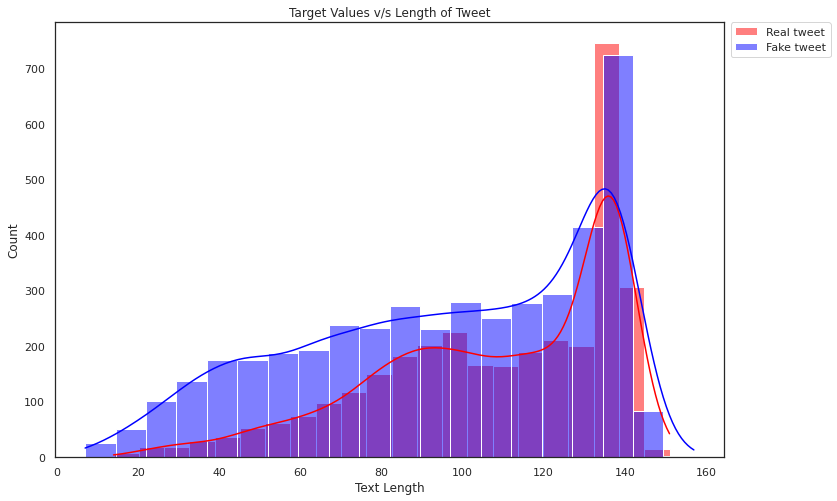

In [9]:
plt.figure(figsize=(12,8))
sns.set(style='white',  font_scale=1, rc={"figure.figsize": [10, 10]})
sns.histplot(data=list1, color='red', label="Real tweet", kde=True).set(xlabel='Text Length', ylabel='Count')
sns.histplot(data=list0, color='blue', alpha=0.5, label="Fake tweet", kde=True).set(xlabel='Text Length', ylabel='Count')
plt.title("Target Values v/s Length of Tweet")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

Print the number of null values in each column

In [10]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Remove the null values

In [11]:
df = df.dropna()
df 

id  keyword  ...                                               text target
31       48   ablaze  ...  @bbcmtd Wholesale Markets ablaze http://t.co/l...      1
32       49   ablaze  ...  We always try to bring the heavy. #metal #RT h...      0
33       50   ablaze  ...  #AFRICANBAZE: Breaking news:Nigeria flag set a...      1
34       52   ablaze  ...                 Crying out for more! Set me ablaze      0
35       53   ablaze  ...  On plus side LOOK AT THE SKY LAST NIGHT IT WAS...      0
...     ...      ...  ...                                                ...    ...
7575  10826  wrecked  ...  On the bright side I wrecked http://t.co/uEa0t...      0
7577  10829  wrecked  ...  @widda16 ... He's gone. You can relax. I thoug...      0
7579  10831  wrecked  ...  Three days off from work and they've pretty mu...      0
7580  10832  wrecked  ...  #FX #forex #trading Cramer: Iger's 3 words tha...      0
7581  10833  wrecked  ...  @engineshed Great atmosphere at the British Li...      0

[5080 rows x 5 columns]

Remove:


1.   Double Spaces
2.   Hypens and arrows
3.   Emojis
4.   URL
5.   Any other non english or special symbol

Replace wrong spellings with correct spellings



Removing URLs

In [12]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df["text_no_url"] = df["text"].apply(lambda text: remove_urls(text))

df.head()

id keyword  ... target                                        text_no_url
31  48  ablaze  ...      1                  @bbcmtd Wholesale Markets ablaze 
32  49  ablaze  ...      0      We always try to bring the heavy. #metal #RT 
33  50  ablaze  ...      1  #AFRICANBAZE: Breaking news:Nigeria flag set a...
34  52  ablaze  ...      0                 Crying out for more! Set me ablaze
35  53  ablaze  ...      0  On plus side LOOK AT THE SKY LAST NIGHT IT WAS...

[5 rows x 6 columns]

Removing punctuations

In [13]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_no_punc"] = df["text_no_url"].apply(lambda text: remove_punctuation(text))
# df["location"] = df["location"].apply(lambda text: remove_punctuation(text))
df.head()

id  ...                                       text_no_punc
31  48  ...                   bbcmtd Wholesale Markets ablaze 
32  49  ...         We always try to bring the heavy metal RT 
33  50  ...  AFRICANBAZE Breaking newsNigeria flag set abla...
34  52  ...                  Crying out for more Set me ablaze
35  53  ...  On plus side LOOK AT THE SKY LAST NIGHT IT WAS...

[5 rows x 7 columns]

Removing double space

In [14]:
# df.location = df.location.str.replace('  ', ' ')
df['text_no_doubleSpace'] = df['text_no_punc'].str.replace('  ', ' ')
df.head()

id  ...                                text_no_doubleSpace
31  48  ...                   bbcmtd Wholesale Markets ablaze 
32  49  ...         We always try to bring the heavy metal RT 
33  50  ...  AFRICANBAZE Breaking newsNigeria flag set abla...
34  52  ...                  Crying out for more Set me ablaze
35  53  ...  On plus side LOOK AT THE SKY LAST NIGHT IT WAS...

[5 rows x 8 columns]

Removing emojis

In [15]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df["text_noEmoji"] = df["text_no_doubleSpace"].apply(lambda text: remove_emoji(text))
df.head()

id  ...                                       text_noEmoji
31  48  ...                   bbcmtd Wholesale Markets ablaze 
32  49  ...         We always try to bring the heavy metal RT 
33  50  ...  AFRICANBAZE Breaking newsNigeria flag set abla...
34  52  ...                  Crying out for more Set me ablaze
35  53  ...  On plus side LOOK AT THE SKY LAST NIGHT IT WAS...

[5 rows x 9 columns]

Removing Emoticon

In [16]:
# Thanks : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [17]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)
df["text_no_emoticons"] = df["text_noEmoji"].apply(lambda text: remove_urls(text))
df.head()

id  ...                                  text_no_emoticons
31  48  ...                   bbcmtd Wholesale Markets ablaze 
32  49  ...         We always try to bring the heavy metal RT 
33  50  ...  AFRICANBAZE Breaking newsNigeria flag set abla...
34  52  ...                  Crying out for more Set me ablaze
35  53  ...  On plus side LOOK AT THE SKY LAST NIGHT IT WAS...

[5 rows x 10 columns]

Chats words conversion

In [18]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [19]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)
df["text_wo_chat_words"] = df["text_no_emoticons"].apply(lambda text: chat_words_conversion(text))
df.head()

id  ...                                 text_wo_chat_words
31  48  ...                    bbcmtd Wholesale Markets ablaze
32  49  ...          We always try to bring the heavy metal RT
33  50  ...  AFRICANBAZE Breaking newsNigeria flag set abla...
34  52  ...                  Crying out for more Set me ablaze
35  53  ...  On plus side LOOK AT THE SKY LAST NIGHT IT WAS...

[5 rows x 11 columns]

Converting to lowercase

In [20]:
df["text_lower"] = df["text_wo_chat_words"].str.lower()
df.head()

id  ...                                         text_lower
31  48  ...                    bbcmtd wholesale markets ablaze
32  49  ...          we always try to bring the heavy metal rt
33  50  ...  africanbaze breaking newsnigeria flag set abla...
34  52  ...                  crying out for more set me ablaze
35  53  ...  on plus side look at the sky last night it was...

[5 rows x 12 columns]

Removing stopwords

In [21]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_lower"].apply(lambda text: remove_stopwords(text))
df.head()

id  ...                                       text_wo_stop
31  48  ...                    bbcmtd wholesale markets ablaze
32  49  ...                    always try bring heavy metal rt
33  50  ...  africanbaze breaking newsnigeria flag set abla...
34  52  ...                                  crying set ablaze
35  53  ...               plus side look sky last night ablaze

[5 rows x 13 columns]

Removing frequent words

In [22]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('like', 233),
 ('im', 209),
 ('amp', 196),
 ('new', 176),
 ('fire', 171),
 ('via', 159),
 ('get', 156),
 ('people', 134),
 ('dont', 124),
 ('one', 124)]

In [23]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df.head()

id  ...                                   text_wo_stopfreq
31  48  ...                    bbcmtd wholesale markets ablaze
32  49  ...                    always try bring heavy metal rt
33  50  ...  africanbaze breaking newsnigeria flag set abla...
34  52  ...                                  crying set ablaze
35  53  ...               plus side look sky last night ablaze

[5 rows x 14 columns]

Removing rare words

In [24]:
# Drop the two columns which are no more needed 
# df.drop(["text_wo_punct", "text_wo_stop"], axis=1, inplace=True)

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text_wo_stopfreqrare"] = df["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
df.head()

id  ...                               text_wo_stopfreqrare
31  48  ...                    bbcmtd wholesale markets ablaze
32  49  ...                    always try bring heavy metal rt
33  50  ...  africanbaze breaking newsnigeria flag set abla...
34  52  ...                                  crying set ablaze
35  53  ...               plus side look sky last night ablaze

[5 rows x 15 columns]

Correcting Spelling


In [25]:
!pip install pyspellchecker

In [26]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
# text = "speling correctin"
# correct_spellings(text)
# print(df["text_wo_chat_words"])
# correct_spellings(df["text_wo_chat_words"][31])
df["text_spelling"] = df["text_wo_stopfreqrare"].apply(lambda text: correct_spellings(text))
df.head()

Plot a word cloud of dataset


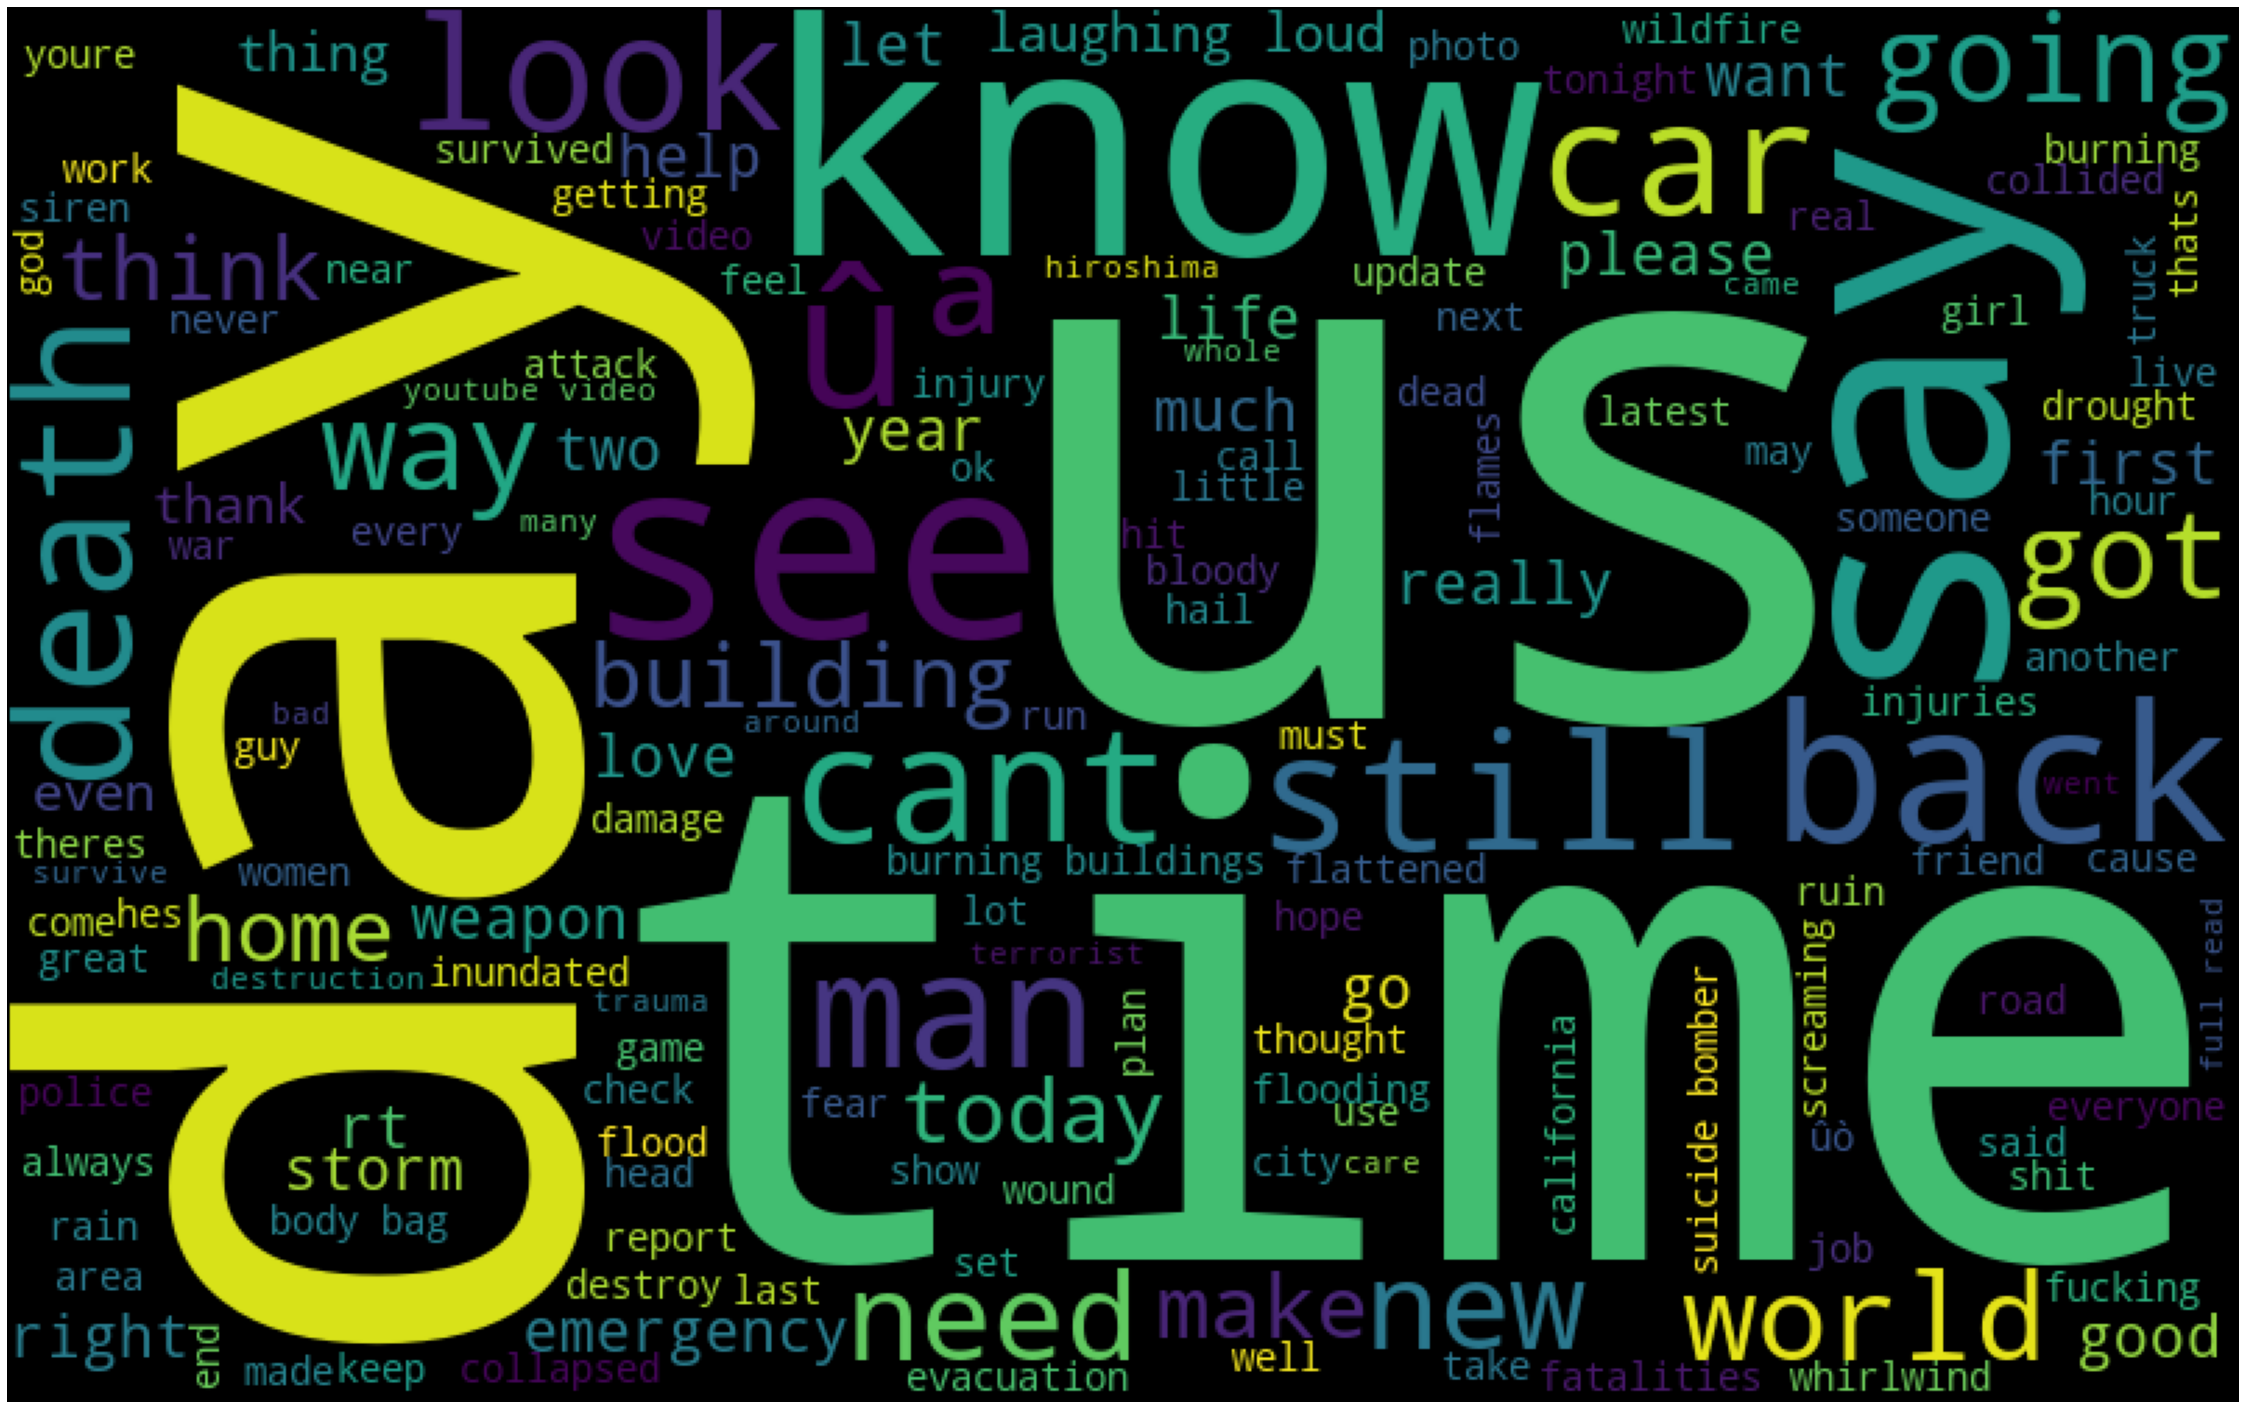

In [27]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

def listToString(s): 
    str1 = " "       
    return (str1.join(s))
from wordcloud import WordCloud, STOPWORDS

textString=listToString(df["text_spelling"])
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='black',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(textString)
# wordcloud = WordCloud(width = 3000, height = 2000, colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(textString)
plot_cloud(wordcloud)

In [28]:
# text0_list=[]
# text1_list=[]
# for i in range(len(df['text_wo_stopfreqrare'])):
#   if(df['target'][i]==0):
#     text0_list.append(df['text_wo_stopfreqrare'][i])
#   else:
#     text1_list.append(df['text_wo_stopfreqrare'][i])
# print(text0_list)
# print(text1_list)

Keep only text and target column in the dataset

In [29]:
list(df)
df = df.drop(['id',	'keyword',	'location','text',	'text_no_url',	'text_no_punc',	'text_no_doubleSpace',	'text_noEmoji',	'text_no_emoticons',	'text_wo_chat_words','text_lower','text_wo_stop','text_wo_stopfreq','text_wo_stopfreqrare'], axis=1)
df


target                               text_wo_stopfreqrare
31         1                    bbcmtd wholesale markets ablaze
32         0                    always try bring heavy metal rt
33         1  africanbaze breaking newsnigeria flag set abla...
34         0                                  crying set ablaze
35         0               plus side look sky last night ablaze
...      ...                                                ...
7575       0                                bright side wrecked
7577       0  hes gone relax thought wife wrecked cake mind ...
7579       0  three days work theyve pretty much wrecked hah...
7580       0         cramer igers 3 words wrecked disneys stock
7581       0  great atmosphere british lion gig tonight hear...

[5080 rows x 2 columns]

In [30]:
print(list(df))

['target', 'text_wo_stopfreqrare']


Split data into train and validation

In [31]:
from sklearn.model_selection import train_test_split
X = df
Y = df['target']
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.2, shuffle= True, random_state= 42)

Print the count of unique words

In [32]:
results = set()
df['text_spelling'].str.lower().str.split().apply(results.update)
count = Counter()
df['text_spelling'].str.lower().str.split().apply(count.update)
print("Count of unique words: ",len(results))
print(count)
# text0_list=[]
# text1_list=[]
# for i,j in count.items():
#   if(df['target']==0):
#     text0_list.append(j)
#   if(df['target']==1):
#     text1_list.append(j)
# print(text0_list)
# print(text1_list)

Count of unique words:  13903
Counter({'emergency': 120, 'news': 116, '2': 114, 'us': 109, 'police': 104, 'video': 104, 'disaster': 97, 'still': 90, 'would': 88, 'buildings': 87, 'back': 85, 'man': 84, 'burning': 84, 'know': 82, 'day': 81, 'body': 81, 'loud': 80, 'see': 79, 'first': 78, 'storm': 78, 'time': 77, 'full': 74, 'cant': 73, 'attack': 72, 'going': 70, 'crash': 69, 'bomb': 69, 'california': 67, 'got': 67, 'accident': 67, 'two': 67, 'watch': 67, 'families': 65, 'nuclear': 65, 'dead': 64, 'suicide': 64, 'rt': 63, 'killed': 63, 'way': 62, 'world': 62, 'life': 61, '3': 61, 'train': 61, 'fires': 60, 'today': 60, 'good': 60, 'think': 60, 'go': 59, 'work': 59, 'youtube': 59, 'may': 59, 'last': 58, 'say': 58, 'love': 58, 'many': 56, 'best': 56, 'car': 55, 'hiroshima': 55, 'war': 53, 'much': 52, 'right': 52, 'could': 52, 'really': 51, 'laughing': 51, 'mass': 51, 'hot': 51, 'collapse': 51, 'black': 50, 'want': 50, 'take': 49, 'years': 48, 'help': 48, 'please': 48, 'need': 48, 'another':

Compute the Term-Document Matrix (TDM) for all classes.

Print the dataframe with number of columns = number of unique words and the row showing the count of that word in a sentence.

In [33]:

from sklearn.feature_extraction.text import CountVectorizer

w = []
df['text_spelling'].str.lower().str.split().apply(w.append)
print((w))
words = []
for i in w:
  words+=i
vectorizer = CountVectorizer()
print(len(words))
count_vec = vectorizer.fit_transform(words)
data = pd.DataFrame(count_vec.toarray(), columns=vectorizer.get_feature_names())
# print(data['ablaze'])

[['bbcmtd', 'wholesale', 'markets', 'ablaze'], ['always', 'try', 'bring', 'heavy', 'metal', 'rt'], ['africanbaze', 'breaking', 'newsnigeria', 'flag', 'set', 'ablaze', 'aba'], ['crying', 'set', 'ablaze'], ['plus', 'side', 'look', 'sky', 'last', 'night', 'ablaze'], ['phdsquares', 'mufc', 'theyve', 'built', 'much', 'hype', 'around', 'acquisitions', 'doubt', 'set', 'epl', 'ablaze', 'season'], ['inec', 'office', 'abia', 'set', 'ablaze'], ['ablaze', 'lord'], ['check', 'nsfw'], ['awesome', 'time', 'visiting', 'cfc', 'head', 'office', 'ancop', 'site', 'ablaze', 'thanks', 'tita', 'vida', 'taking', 'care', 'us'], ['west', 'burned', 'thousands', 'wildfires', 'ablaze', 'california', 'alone'], ['check', 'nsfw'], ['first', 'night', 'retainers', 'quite', 'weird', 'better', 'used', 'wear', 'every', 'single', 'night', 'next', 'year', 'least'], ['deputies', 'man', 'shot', 'brighton', 'home', 'set', 'ablaze'], ['man', 'wife', 'six', 'years', 'jail', 'setting', 'ablaze', 'niece'], ['santa', 'cruz', '\x89û

In [34]:
tdm = pd.DataFrame()
for i in words:
  tdm[i] = [0 for i in range(len(w))]
for c in range(len(w)):
  for i in w[c]:
    print(i)
    tdm[i][c]+=1
tdm

Streaming output truncated to the last 5000 lines.
never
marked
vulnerable
times
ofû
news
tragedy
life
ends
soon
wait
long
begin
wm
lewis
quotes
toiindianews
ofcourse
8
minute
tragedy
another
train
crossed
place
n
flash
flood
caued
washing
tracks
tanehisicoates
even
second
half
great
greek
tragedy
laced
monologue
charlize
coulda
much
dtn
india
rly
tragedy
mp
live
recount
horror
ûïwhen
saw
coaches
train
plunging
water
sriramk
dlin71
pmarca
tragedy
commons
pertains
public
ownership
property
rights
based
markets
opposite
say
itssselenaluna
beautiful
ass
tragedy
laughing
loud
back
home
mad
cause
chill
white
boys
rly
tragedy
mp
live
recount
horror
ûïwhen
saw
coaches
train
plunging
water
called
myû
gunning
romance
never
thing
heartache
misery
aint
nothing
tragedy
rly
tragedy
mp
live
recount
horror
ûïwhen
saw
coaches
train
plunging
water
called
daughters
said
rly
tragedy
mp
live
recount
horror
ûïwhen
saw
coaches
train
plunging
water
called
rt
hirochii0
country
making
fun
hiroshima
trage

bbcmtd  wholesale  markets  ablaze  ...  noticed  topnews  caitsroberts  barra
0          1          1        1       1  ...        0        0             0      0
1          0          0        0       0  ...        0        0             0      0
2          0          0        0       1  ...        0        0             0      0
3          0          0        0       1  ...        0        0             0      0
4          0          0        0       1  ...        0        0             0      0
...      ...        ...      ...     ...  ...      ...      ...           ...    ...
5075       0          0        0       0  ...        0        0             0      0
5076       0          0        0       0  ...        0        0             0      0
5077       0          0        0       0  ...        0        0             0      0
5078       0          0        0       0  ...        0        0             0      0
5079       0          0        0       0  ...        0        0             0      0

[5080 rows x 13903 columns]

In [56]:
# TDM for class 0
words = []
d0['text_spelling'].str.lower().str.split().apply(words.append)
print((words))
allwords = []
for i in words:
  allwords+=i
print(len(allwords))
tdmc0 = pd.DataFrame()
tdmc0['sentence'] = words
for word in allwords:
  tdmc0[word] = [0 for i in range(len(words))]
for c in range(len(words)):
  for i in words[c]:
    tdmc0[i][c]+=1
tdmc0

[['always', 'try', 'bring', 'heavy', 'metal', 'rt'], ['crying', 'set', 'ablaze'], ['plus', 'side', 'look', 'sky', 'last', 'night', 'ablaze'], ['phdsquares', 'mufc', 'theyve', 'built', 'much', 'hype', 'around', 'acquisitions', 'doubt', 'set', 'epl', 'ablaze', 'season'], ['ablaze', 'lord'], ['check', 'nsfw'], ['awesome', 'time', 'visiting', 'cfc', 'head', 'office', 'ancop', 'site', 'ablaze', 'thanks', 'tita', 'vida', 'taking', 'care', 'us'], ['check', 'nsfw'], ['first', 'night', 'retainers', 'quite', 'weird', 'better', 'used', 'wear', 'every', 'single', 'night', 'next', 'year', 'least'], ['santa', 'cruz', '\x89ûó', 'head', 'st', 'elizabeth', 'police', 'superintendent', 'lanford', 'salmon', 'r'], ['noches', 'elbestia', 'alexissanchez', 'happy', 'see', 'teammates', 'training', 'hard', 'goodnight', 'gunners'], ['set', 'hearts', 'ablaze', 'every', 'city', 'gift', 'every', 'skyline', 'keep', 'simple,', 'stupid', 'upon', 'lips', '\x89û'], ['sky', 'ablaze', 'tonight', 'los', 'angeles', 'expecti

sentence  always  ...  barra  wife
0                [always, try, bring, heavy, metal, rt]       1  ...      0     0
1                                 [crying, set, ablaze]       0  ...      0     0
2          [plus, side, look, sky, last, night, ablaze]       0  ...      0     0
3     [phdsquares, mufc, theyve, built, much, hype, ...       0  ...      0     0
4                                        [ablaze, lord]       0  ...      0     0
...                                                 ...     ...  ...    ...   ...
2879                            [bright, side, wrecked]       0  ...      0     0
2880  [hes, gone, relax, thought, wife, wrecked, cak...       0  ...      0     1
2881  [three, days, work, theyve, pretty, much, wrec...       0  ...      0     0
2882  [cramer, igers, 3, words, wrecked, disneys, st...       0  ...      0     0
2883  [great, atmosphere, british, lion, gig, tonigh...       0  ...      0     0

[2884 rows x 9513 columns]

In [57]:
words = []
d1['text_spelling'].str.lower().str.split().apply(words.append)
print((words))
allwords = []
for i in words:
  allwords+=i
print(len(allwords))
tdmc1 = pd.DataFrame()
tdmc1['sentence'] = words
for word in allwords:
  tdmc1[word] = [0 for i in range(len(words))]
for c in range(len(words)):
  for i in words[c]:
    tdmc1[i][c]+=1
tdmc1

[['bbcmtd', 'wholesale', 'markets', 'ablaze'], ['africanbaze', 'breaking', 'newsnigeria', 'flag', 'set', 'ablaze', 'aba'], ['inec', 'office', 'abia', 'set', 'ablaze'], ['west', 'burned', 'thousands', 'wildfires', 'ablaze', 'california', 'alone'], ['deputies', 'man', 'shot', 'brighton', 'home', 'set', 'ablaze'], ['man', 'wife', 'six', 'years', 'jail', 'setting', 'ablaze', 'niece'], ['police', 'arsonist', 'deliberately', 'set', 'black', 'church', 'north', 'carolinaåêablaze'], ['kurds', 'trampling', 'turkmen', 'flag', 'later', 'set', 'ablaze', 'others', 'vandalized', 'offices', 'turkmen', 'front', 'diyala'], ['truck', 'ablaze', 'r21', 'voortrekker', 'ave', 'outside', 'tambo', 'intl', 'cargo', 'section'], ['west', 'burned', 'thousands', 'wildfires', 'ablaze', 'california', 'alone', 'climate', 'energy'], ['navista7', 'steve', 'fires', 'something', 'else', 'california', 'tinderbox', 'clown', 'setting', 'hood', 'ablaze', 'news24680'], ['nxwestmidlands', 'huge', 'wholesale', 'markets', 'ablaze

sentence  bbcmtd  ...  wrecked  wants
0                  [bbcmtd, wholesale, markets, ablaze]       1  ...        0      0
1     [africanbaze, breaking, newsnigeria, flag, set...       0  ...        0      0
2                     [inec, office, abia, set, ablaze]       0  ...        0      0
3     [west, burned, thousands, wildfires, ablaze, c...       0  ...        0      0
4     [deputies, man, shot, brighton, home, set, abl...       0  ...        0      0
...                                                 ...     ...  ...      ...    ...
2191  [wreckage, conclusively, confirmed, mh370, mal...       0  ...        0      0
2192  [wreckage, conclusively, confirmed, missing, f...       0  ...        0      0
2193  [wreckage, conclusively, confirmed, mh370, mal...       0  ...        0      0
2194               [israel, wrecked, home, wants, land]       0  ...        1      1
2195                                          [wrecked]       0  ...        1      0

[2196 rows x 7355 columns]

Word cloud for real and fake tweets

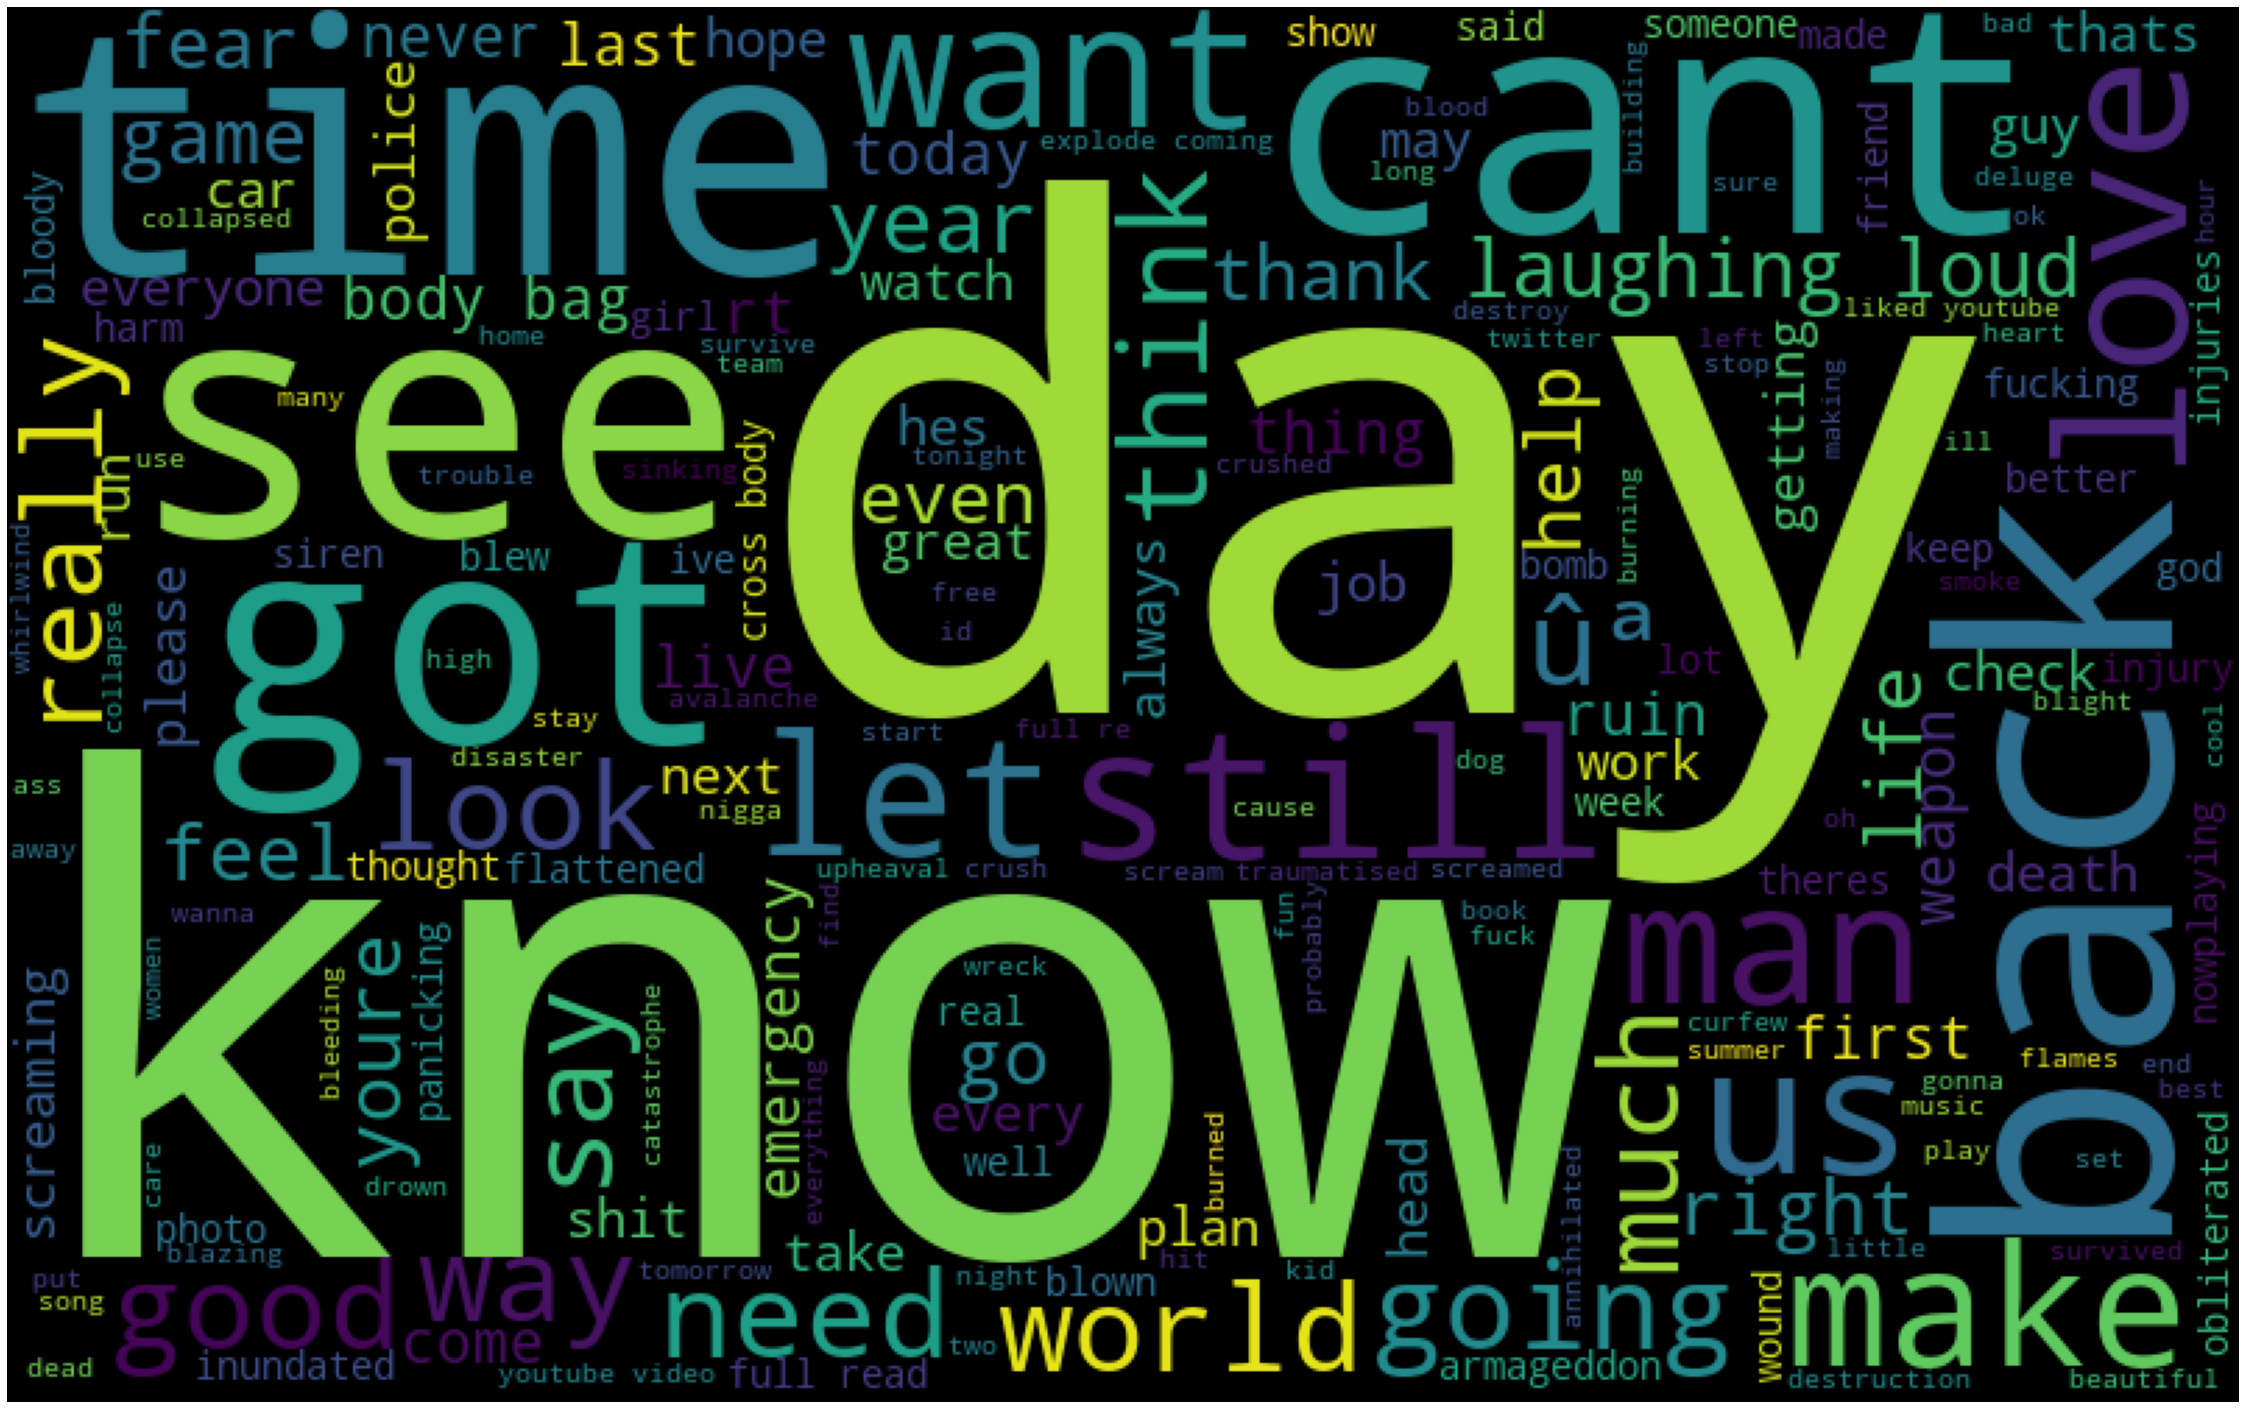

In [35]:



def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

def listToString(s): 
    str1 = " "       
    return (str1.join(s))
from wordcloud import WordCloud, STOPWORDS
# df["text"] = data["text_wo_stopfreq"]
d0 = df[df['target']==0]
d1 = df[df['target']==1]
w0 = ''
for val in d0['text_spelling']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    w0 += " ".join(tokens)+" "
# textString=listToString(text0_list)
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='black',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(w0)
# wordcloud = WordCloud(width = 3000, height = 2000, colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(textString)
plot_cloud(wordcloud)

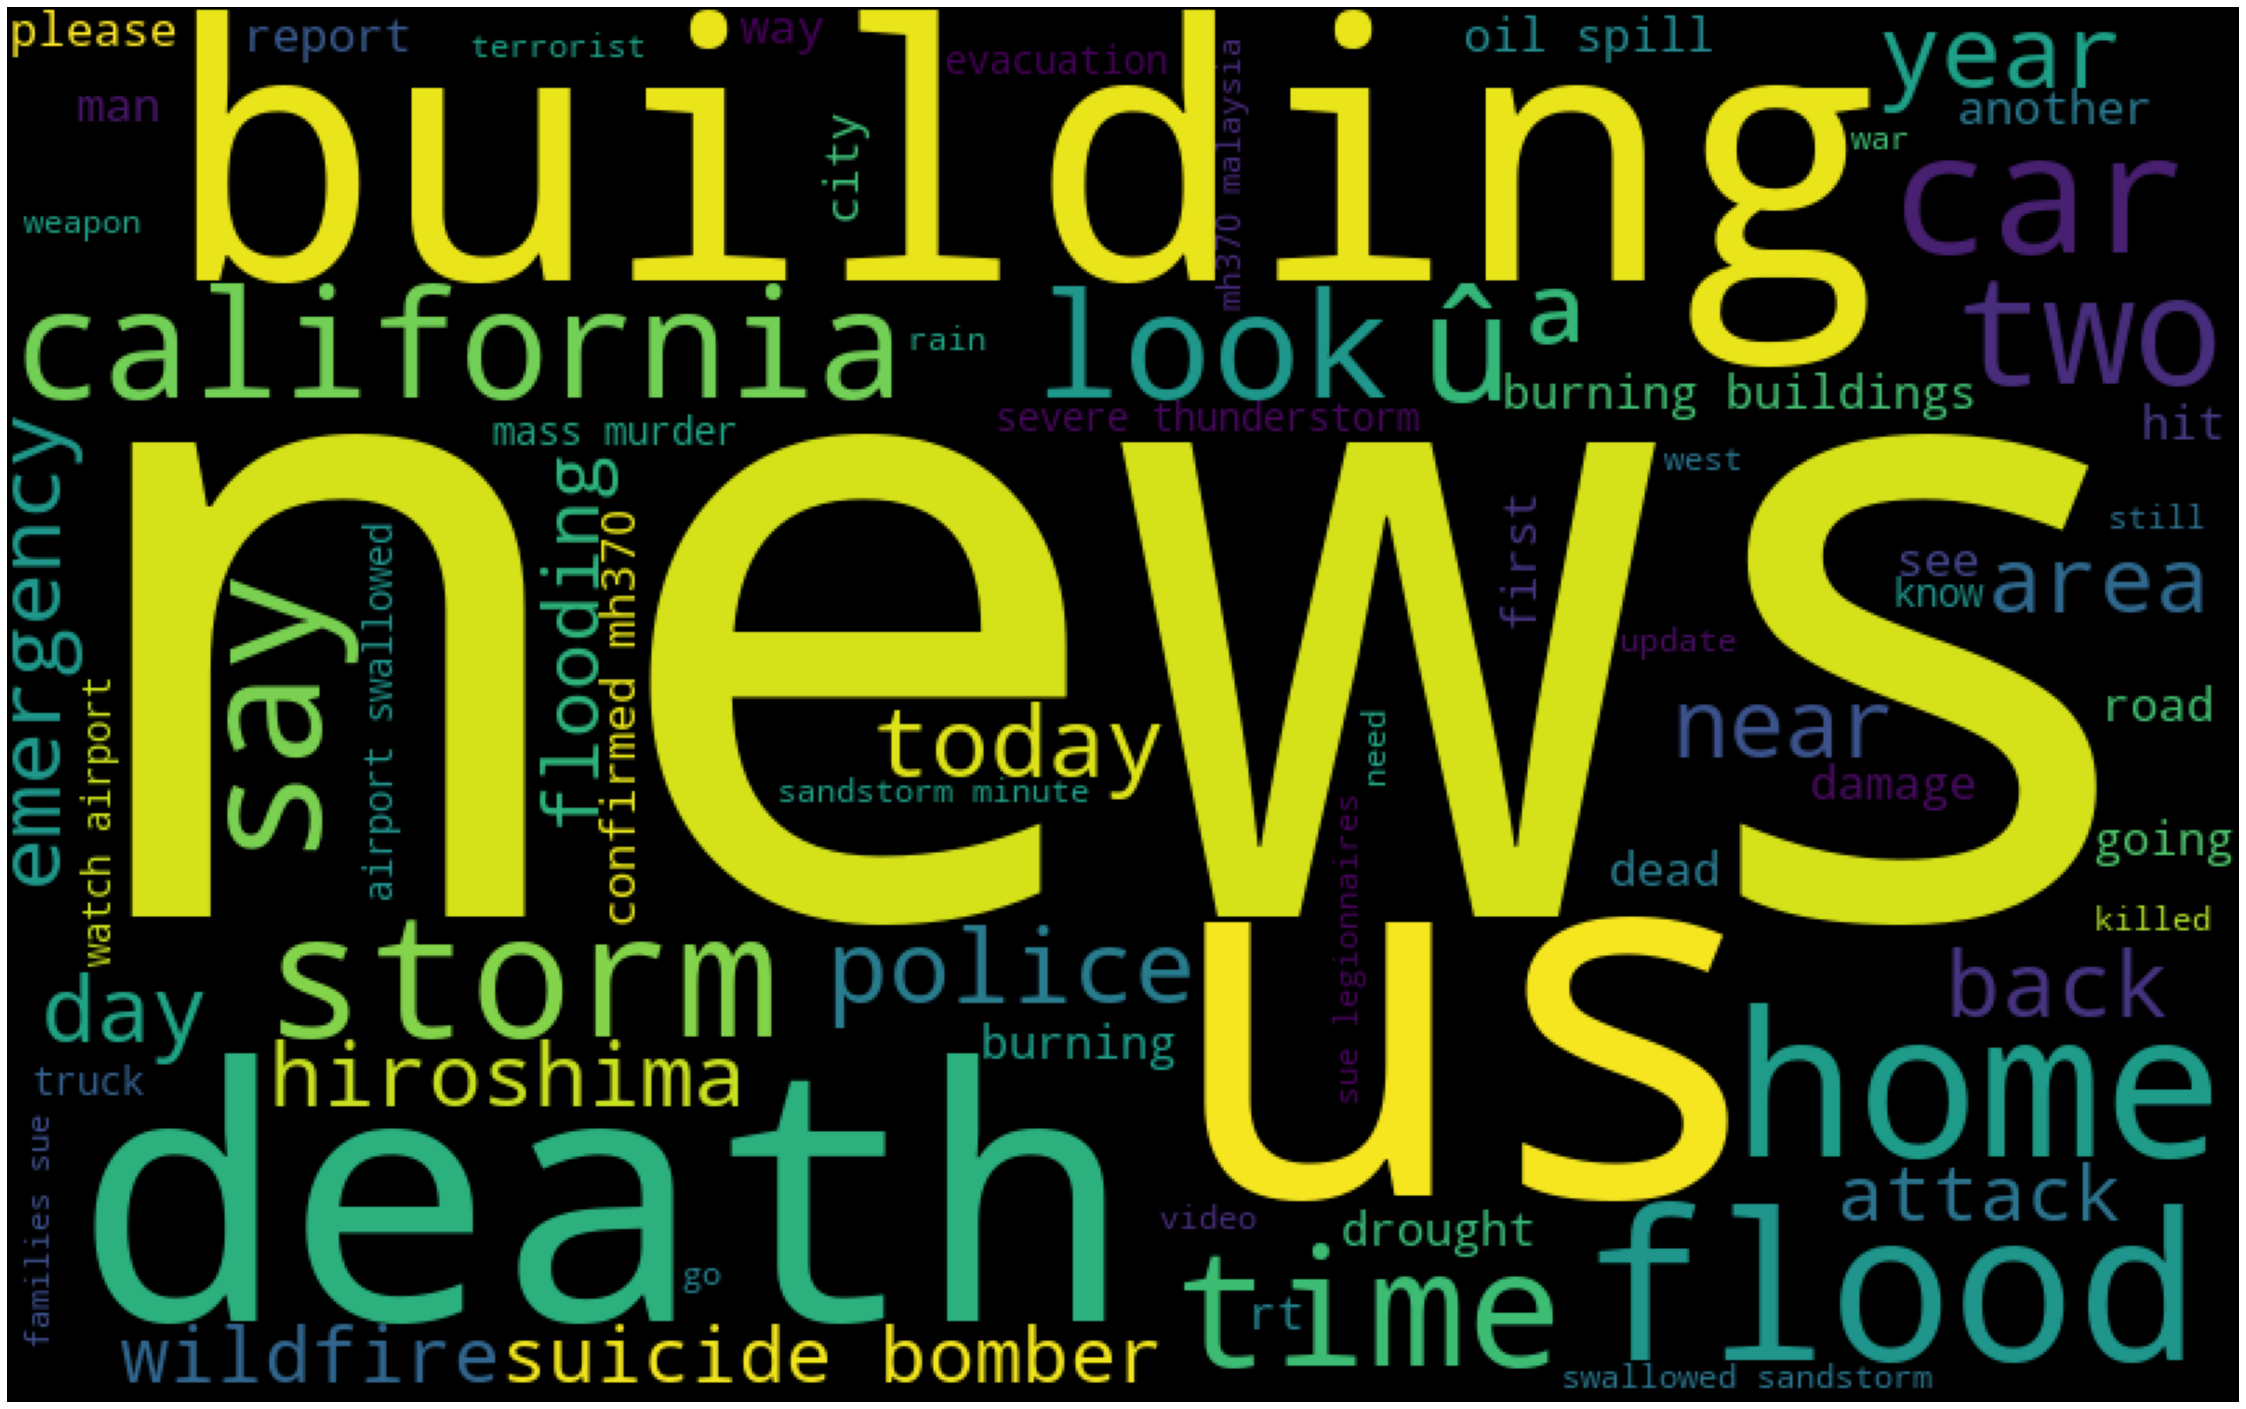

In [36]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

def listToString(s): 
    str1 = " "       
    return (str1.join(s))
w1 = ''
for val in d1['text_spelling']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    w1 += " ".join(tokens)+" "
from wordcloud import WordCloud, STOPWORDS

# textString=listToString(text1_list)
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='black',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(w1)
# wordcloud = WordCloud(width = 3000, height = 2000, colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(textString)
plot_cloud(wordcloud)

In [37]:
# # # plt.figure(figsize=(40,20))

# # # sns.barplot(y=list(vocab_count.values()), x=list(vocab_count.keys())).set(xlabel='Keywords', ylabel='Count');
# # # plt.xticks(rotation=-90)
# # # # sns.histplot(data=df['keyword'], color="teal", label="Count")
# # # # plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# # # # plt.title("Count of Keywords")
# # # plt.show()

# xcoor=[]
# ycoor=[]

# for i,j in vocab_count.items():
#   xcoor.append(i)
#   ycoor.append(j)
# print(xcoor)
# print(ycoor)
# sns.set(style='white', palette="deep", font_scale=0.4, rc={"figure.figsize": [30, 10]})
# sns.barplot(x=xcoor,y=ycoor, palette="rocket", color='red',label="Count")
# # plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# # plt.title("Count of keywords")
# plt.xticks(rotation=90)
# plt.show()

Frequency of words in class 0 and 1

In [38]:
class0 = X_train[X_train['target'] == 0]
print (class0)
count0 = Counter()
class0['text_spelling'].str.lower().str.split().apply(count0.update)
print(count0)
total0 = []
class0['text_spelling'].str.lower().str.split().apply(total0.append)
print("Frequency of words in class 0: ",len(total0))

      target                               text_wo_stopfreqrare
3873       0  cwhoops better make shots tomorrow cause recor...
3382       0  batfanuk enjoyed show today great fun emergenc...
6664       0  generational û÷british schismûª privacy thre...
5217       0  oh teamhennessy nj obliteration tprimo24 round...
7358       0  sixth year row premium costs windstorm insuran...
...      ...                                                ...
4721       0                       waiting chocolate lava cakes
5128       0  government pressure abandon plans construct uk...
709        0  funkylilshack mariaf30 want full bitch slappin...
4602       0  sergiopiaggio iûªd worked hard level wasnûªt...
1312       0                            burning legion returned

[2304 rows x 2 columns]
Counter({'body': 56, '2': 53, 'full': 51, 'would': 51, 'still': 49, 'know': 46, 'video': 46, 'emergency': 45, 'time': 44, 'us': 44, 'loud': 44, 'cant': 43, 'see': 43, 'got': 43, 'day': 42, 'love': 42, 'back'

In [39]:
class1 = X_train[X_train['target'] == 1]
print (class1)
count1 = Counter()
class1['text_spelling'].str.lower().str.split().apply(count1.update)
print(count1)
total1 = []
class1['text_spelling'].str.lower().str.split().apply(total1.append)
print("Frequency of words in class 1: ",len(total1))

      target                               text_wo_stopfreqrare
5732       1          rescuers found barely alive idea allergic
3233       1  services returning normal southline medical em...
6100       1  ap slow report sinking boat mediterranean sea ...
1164       1  ashes 2015 australiaûªs collapse trent bridge...
2941       1  pick ground swam drowned hit bottom hard bounc...
...      ...                                                ...
3550       1  exporting food wont solve problem africans end...
1179       1  two giant cranes holding bridge collapse nearb...
4330       1  criminals hijack lorries buses arrested enugu ...
6604       1    crossborder terrorism pakistan caught redhanded
5609       1  george njenga hero saved burning friend razing...

[1760 rows x 2 columns]
Counter({'police': 64, 'news': 62, 'disaster': 61, 'california': 53, 'families': 51, 'emergency': 50, 'buildings': 48, 'storm': 47, 'suicide': 46, 'killed': 45, 'fires': 45, 'legionnaires': 44, 'hiroshima': 

Prior probability for class 0 & 1

In [40]:
# # by length of a column
# pc0 = len(text0_list)/(len(text0_list)+len(text1_list))
# pc1 = len(text1_list)/(len(text0_list)+len(text1_list))
# print("Prior Probability for Class 0:", pc0)
# print("Prior Probability for Class 1:", pc1)


Does the sum of the unique words in target 0 and 1 sum upto the total number of unique words in the whole document? Why or why not? Explain in report.

In [41]:
total_unique = set()
df['text_spelling'].str.lower().str.split().apply(total_unique.update)
print("Total unique words ",len(total_unique))

Total unique words  13903


In [42]:
uniquec0 = set()
d0['text_spelling'].str.lower().str.split().apply(uniquec0.update)
print("Total unique words class 0 ",len(uniquec0))

Total unique words class 0  9512


In [43]:
uniquec1 = set()
d1['text_spelling'].str.lower().str.split().apply(uniquec1.update)
print("Total unique words class 1 ",len(uniquec1))

Total unique words class 1  7354


No the sum of frequency of unique words in target 0 and target 1 does not sum upto the to frequency of unique words in the whole document as while splitting the dataset acc. to classes some words might appear in both places. 

Neither do the number of keywords in both classes individually sum upto the total number of keywords in the dataset

Total frequency

In [44]:
count = Counter()
X_train['text_spelling'].str.lower().str.split().apply(count.update)
print(count)
total = []
X_train['text_spelling'].str.lower().str.split().apply(total.append)
print("Total frequency of words:",len(total))

Counter({'emergency': 95, '2': 94, 'news': 91, 'us': 85, 'police': 83, 'video': 82, 'disaster': 79, 'still': 77, 'burning': 69, 'buildings': 68, 'would': 67, 'storm': 65, 'man': 64, 'back': 64, 'body': 63, 'time': 62, 'watch': 60, 'day': 60, 'know': 59, 'first': 59, 'loud': 59, 'full': 58, 'bomb': 58, 'see': 57, 'going': 56, 'families': 55, 'cant': 55, 'california': 55, 'way': 54, 'two': 54, 'attack': 53, 'fires': 53, 'got': 53, 'rt': 52, 'nuclear': 52, 'today': 51, '3': 49, 'go': 49, 'suicide': 49, 'many': 49, 'accident': 49, 'crash': 49, 'train': 48, 'best': 48, 'think': 48, 'youtube': 47, 'love': 47, 'good': 47, 'may': 47, 'killed': 47, 'life': 47, 'war': 46, 'car': 46, 'dead': 46, 'world': 45, 'last': 45, 'say': 45, 'legionnaires': 44, 'need': 43, 'hiroshima': 43, 'work': 43, 'could': 43, 'black': 42, 'years': 42, 'hot': 42, 'make': 41, 'collapse': 41, 'mass': 41, 'right': 41, 'another': 40, 'really': 40, 'old': 38, 'pm': 38, 'city': 38, 'want': 38, 'please': 38, 'laughing': 38, 't

Calculate the probability for each word in a given class.

Class 0

In [45]:
p0 = {}
for i,j in count0.items():
  p0[i] = j/len(total0)
print(p0)

{'cwhoops': 0.00043402777777777775, 'better': 0.008246527777777778, 'make': 0.012586805555555556, 'shots': 0.0013020833333333333, 'tomorrow': 0.005208333333333333, 'cause': 0.005642361111111111, 'recording': 0.00043402777777777775, 'flames': 0.006076388888888889, 'thrown': 0.00043402777777777775, 'batfanuk': 0.00043402777777777775, 'enjoyed': 0.0008680555555555555, 'show': 0.008246527777777778, 'today': 0.008246527777777778, 'great': 0.008680555555555556, 'fun': 0.006076388888888889, 'emergency': 0.01953125, 'non': 0.00043402777777777775, 'evacuation': 0.0026041666666666665, 'interesting': 0.0026041666666666665, 'run': 0.006510416666666667, 'generational': 0.00043402777777777775, '\x89û÷british': 0.00043402777777777775, 'schism\x89ûª': 0.00043402777777777775, 'privacy': 0.0008680555555555555, 'threat': 0.0026041666666666665, 'drones': 0.0008680555555555555, 'oh': 0.006076388888888889, 'teamhennessy': 0.00043402777777777775, 'nj': 0.00043402777777777775, 'obliteration': 0.00694444444444

Class 1

In [46]:
p1 = {}
for i,j in count1.items():
  p1[i] = j/len(total1)
print(p1)

{'rescuers': 0.007386363636363636, 'found': 0.0125, 'barely': 0.0005681818181818182, 'alive': 0.0005681818181818182, 'idea': 0.0005681818181818182, 'allergic': 0.0005681818181818182, 'services': 0.006818181818181818, 'returning': 0.0005681818181818182, 'normal': 0.0017045454545454545, 'southline': 0.0005681818181818182, 'medical': 0.0017045454545454545, 'emergency': 0.028409090909090908, 'yennora': 0.0005681818181818182, 'urgent': 0.0017045454545454545, 'track': 0.0022727272727272726, 'equipment': 0.0011363636363636363, 'repairs': 0.0011363636363636363, 'cabramatta': 0.0005681818181818182, 'earlier': 0.0017045454545454545, 'ap': 0.0022727272727272726, 'slow': 0.0022727272727272726, 'report': 0.00909090909090909, 'sinking': 0.003409090909090909, 'boat': 0.006818181818181818, 'mediterranean': 0.0022727272727272726, 'sea': 0.003409090909090909, 'shame': 0.0011363636363636363, 'ashes': 0.0022727272727272726, '2015': 0.009659090909090909, 'australia\x89ûªs': 0.0005681818181818182, 'collapse

We have calculated the probability of occurrence of word in a class, we can now substitute the values in the Baye's equation. 

If a word from the new sentence does not occur in the class within the training set, the equation becomes zero. This problem can be solved using smoothing like Laplace smoothing. 

In [47]:
print(X_val['text_spelling'])
Word = []
X_val['text_spelling'].str.lower().str.split().apply(Word.append)
print(X_val.shape)
print(Y_val.shape)
print((Word))

3389    update bend fd natural gas line cut prompted e...
5602    today another dualcom imrazed enjoyed yesterda...
71      stlouis caraccidentlawyer speeding among top c...
1851    woman crush wedneday goes beautiful taykreidle...
4547    udhampur terror attack militants attack police...
                              ...                        
2872                                         drought real
1012    woke drake body bagging meek meek cant spit ya...
6345    investigators said virgin galactic spaceship c...
3686                                 chrisman528 fatality
7453    thought surgical wounds healed weather aint he...
Name: text_wo_stopfreqrare, Length: 1016, dtype: object
(1016, 2)
(1016,)
[['update', 'bend', 'fd', 'natural', 'gas', 'line', 'cut', 'prompted', 'evacuation', 'main', 'post', 'office', 'afternoon'], ['today', 'another', 'dualcom', 'imrazed', 'enjoyed', 'yesterdays', 'check', 'todays', '5', 'pm', 'easter'], ['stlouis', 'caraccidentlawyer', 'speeding', 'among', 

Probability for class 0

In [48]:
# print(X_val['text_wo_stopfreqrare'])
# W = []
# df['text_wo_stopfreqrare'].str.lower().str.split().apply(W.append)
# print((W))
# d0 = df[df['target']==0]
# d1 = df[df['target']==1]
prob_c0 = len(d0['text_spelling'])/len(df['text_spelling'])
print("Probability for class 0: ",prob_c0)

Probability for class 0:  0.5677165354330709


Probability for class 1

In [49]:
# for i in prob0.keys():
#   prob0[i] = prob0[i] + len(count)
# print(prob0)  

prob_c1 = len(d1['text_spelling'])/len(df['text_spelling'])
print("Probability for class 0: ",prob_c1)

Probability for class 0:  0.4322834645669291


In [50]:
pc0 = []
for i in Word:
  smooth = 1
  for j in i:
    smooth*= (count0[j]+1)/(len(total0) + len(count))*(prob_c0)
  pc0.append(smooth)
print((pc0))

[5.773664052023974e-52, 6.244042606296448e-42, 7.239469688459648e-45, 3.2606159009512146e-31, 4.131854324602891e-56, 1.9701993798523269e-16, 7.688861583256239e-27, 5.75654972040657e-40, 1.905474200080749e-61, 7.012345791120543e-23, 6.882447118366099e-48, 1.4751189085337098e-19, 8.305400065204175e-29, 6.323687434959617e-48, 5.37393551517909e-27, 1.3269602862529973e-30, 3.0715053255518143e-46, 4.850321285494974e-28, 4.7079446708026085e-09, 1.0270940087996327e-29, 8.144403399517108e-47, 5.885213676573153e-34, 3.7102358683177467e-23, 9.287682403656748e-60, 4.015536156380696e-59, 1.391338450619155e-25, 2.0382640034221877e-40, 9.0742639740901e-50, 3.028706530347277e-51, 6.956692253095774e-25, 2.841602369279883e-26, 6.20354468824383e-54, 9.963073899134194e-28, 5.319538325601285e-16, 3.957627932779518e-41, 7.2781604931946745e-34, 2.7380439775398378e-31, 3.10291430265781e-59, 3.947348379707363e-37, 3.113869670144524e-37, 1.009680546198295e-39, 1.8098674221149119e-47, 1.5365821963892811e-19, 2.7

In [51]:
pc1 = []
for i in Word:
  smooth = 1
  for j in i:
    smooth*= (count1[j]+1)/(len(total1) + len(count))*(prob_c1)
  pc1.append(smooth)
print(pc1)

[7.118382000482806e-49, 3.980071661960759e-43, 5.077155100138564e-44, 4.2034249431877334e-34, 9.808809390890837e-52, 5.219022286966832e-16, 3.431977361416214e-29, 9.503465403395342e-39, 2.4841674020634832e-60, 1.0159025197582682e-23, 2.960633876934635e-41, 1.608121195786838e-16, 8.137830690011454e-32, 1.2269550146744935e-45, 8.150946233363513e-29, 1.3935194371655974e-30, 2.0333288825514744e-46, 4.260180231619087e-30, 2.949299998012758e-09, 6.920518826464284e-30, 7.601359171048048e-48, 4.397416614061142e-35, 2.0067210266829987e-24, 8.797587970234581e-60, 8.726875346002405e-63, 1.9003040025407183e-26, 3.0958262805722964e-45, 3.3261181614294684e-52, 9.258367096414285e-56, 9.501520012703593e-27, 4.881034469569727e-28, 3.578527789275775e-59, 1.271115702819971e-31, 2.087608914786733e-16, 1.933957143548097e-41, 2.5709484515980495e-25, 5.60420789865516e-29, 7.593450148003235e-62, 2.33149277861076e-39, 2.0501596000125216e-38, 4.087022632039486e-41, 1.2668931951746746e-48, 5.151612174868795e-22,

Print target class

In [52]:
Y_pred = []
for i in range(len(pc0)):
  if pc0[i] > pc1[i]:
    Y_pred.append(0)
  else:
    Y_pred.append(1)

print("Y_pred: ",Y_pred)

Y_pred:  [1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

Accuracy score

In [53]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ",accuracy_score(Y_val, Y_pred))

Accuracy score:  0.7854330708661418


Confusion matrix

[[553  27]
 [191 245]]


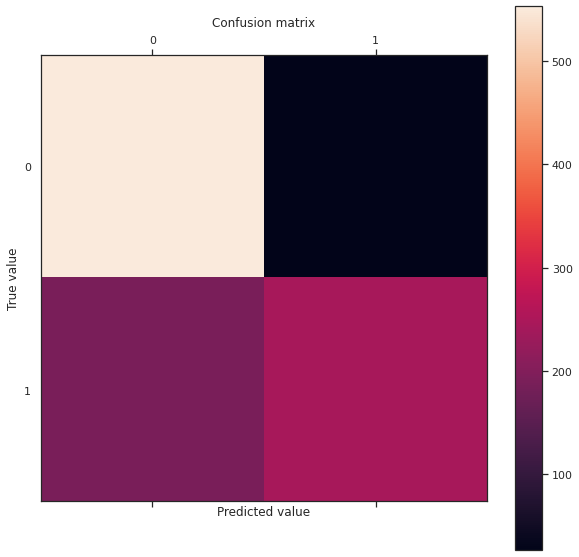

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_val, Y_pred)
print(cm)
labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix') 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
plt.xlabel('Predicted value') 
plt.ylabel('True value') 
plt.show()

PRecision, recall , F1_score

In [55]:
# from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
# result = precision_recall_fscore_support(Y_val, Y_pred)
# print("Precision for class 0 and 1 = ",result[0])
# print("Recall for class 0 and 1 = ",result[1])
# print("Fscore for class 0 and 1 = ",result[2])
print(classification_report(Y_val, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.84       580
           1       0.90      0.56      0.69       436

    accuracy                           0.79      1016
   macro avg       0.82      0.76      0.76      1016
weighted avg       0.81      0.79      0.77      1016



References:

[Ref1](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)